In [2]:
import os
import io
import IPython.display
from PIL import Image
import base64 
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
hf_api_key = os.environ['HF_API_KEY']

In [23]:
# Helper function
import requests, json

#Text-to-image endpoint
def get_completion_api_ref(inputs, parameters=None, ENDPOINT_URL=os.environ['HF_API_TTI_BASE']):
    headers = {
      "Authorization": f"Bearer {hf_api_key}",
      "Content-Type": "application/json"
    } 
    response = requests.post(ENDPOINT_URL, headers=headers, json=inputs)
    
    return response.content

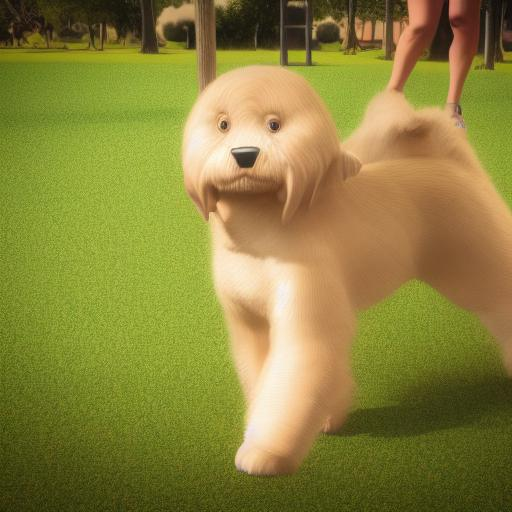

In [24]:
prompt = "a dog in a park realistic close up"

result = get_completion_api_ref(prompt)
image = Image.open(io.BytesIO(result))
image

In [37]:
# Text-to-image endpoint
def get_completion(inputs, parameters=None, ENDPOINT_URL=os.environ['HF_API_TTI_BASE']):
    headers = {
        "Authorization": f"Bearer {hf_api_key}",
        "Content-Type": "application/json"
    }
    data = {"inputs": inputs}
    if parameters is not None:
        data.update({"parameters": parameters})

    response = requests.post(ENDPOINT_URL, headers=headers, data=json.dumps(data))
    
    # Check the content type of the response
    content_type = response.headers.get('Content-Type', '')
    print(content_type)
    if 'application/json' in content_type:
        return json.loads(response.content.decode("utf-8"))
    elif 'image/' in content_type:
        return response.content  # return raw image data

    response.raise_for_status()  # raise an error for unexpected content types

In [38]:
import gradio as gr

def generate(prompt):
    output = get_completion(prompt)
    
    # Check if the output is an image (bytes) or JSON (dict)
    if isinstance(output, dict):
        raise ValueError("Expected an image but received JSON: {}".format(output))
    
    # If output is raw image data, convert it to a PIL image
    result_image = Image.open(io.BytesIO(output))
    return result_image


gr.close_all()
demo = gr.Interface(
    fn=generate,
    inputs=[gr.Textbox(label="Your prompt")],
    outputs=[gr.Image(label="Result")],
    title="Image Generation with Stable Diffusion",
    description="Generate any image with Stable Diffusion",
    allow_flagging="never",
    examples=["the spirit of a tamagotchi wandering in the city of Vienna", "a mecha robot in a favela"]
)

demo.launch(share=True, server_port=int(os.environ['PORT1']))

Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://af11acd1627ef57310.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


image/jpeg
application/json


Traceback (most recent call last):
  File "/Users/dolphinium/anaconda3/envs/hf-nlp/lib/python3.9/site-packages/gradio/queueing.py", line 536, in process_events
    response = await route_utils.call_process_api(
  File "/Users/dolphinium/anaconda3/envs/hf-nlp/lib/python3.9/site-packages/gradio/route_utils.py", line 288, in call_process_api
    output = await app.get_blocks().process_api(
  File "/Users/dolphinium/anaconda3/envs/hf-nlp/lib/python3.9/site-packages/gradio/blocks.py", line 1931, in process_api
    result = await self.call_function(
  File "/Users/dolphinium/anaconda3/envs/hf-nlp/lib/python3.9/site-packages/gradio/blocks.py", line 1516, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "/Users/dolphinium/anaconda3/envs/hf-nlp/lib/python3.9/site-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
  File "/Users/dolphinium/anaconda3/envs/hf-nlp/lib/python3.9/site-packages/anyi

image/jpeg


In [39]:
gr.close_all()

Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860


In [40]:
import gradio as gr 

#A helper function to convert the PIL image to base64 
# so you can send it to the API
def base64_to_pil(img_base64):
    base64_decoded = base64.b64decode(img_base64)
    byte_stream = io.BytesIO(base64_decoded)
    pil_image = Image.open(byte_stream)
    return pil_image

def generate(prompt, negative_prompt, steps, guidance, width, height):
    params = {
        "negative_prompt": negative_prompt,
        "num_inference_steps": steps,
        "guidance_scale": guidance,
        "width": width,
        "height": height
    }
    
    output = get_completion(prompt,params)
    
    # Check if the output is an image (bytes) or JSON (dict)
    if isinstance(output, dict):
        raise ValueError("Expected an image but received JSON: {}".format(output))
    
    # If output is raw image data, convert it to a PIL image
    result_image = Image.open(io.BytesIO(output))
    return result_image

gr.close_all()
demo = gr.Interface(fn=generate,
                    inputs=[
                        gr.Textbox(label="Your prompt"),
                        gr.Textbox(label="Negative prompt"),
                        gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                                 info="In how many steps will the denoiser denoise the image?"),
                        gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7, 
                                  info="Controls how much the text prompt influences the result"),
                        gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512),
                        gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512),
                    ],
                    outputs=[gr.Image(label="Result")],
                    title="Image Generation with Stable Diffusion",
                    description="Generate any image with Stable Diffusion",
                    allow_flagging="never"
                    )

demo.launch(share=True, server_port=int(os.environ['PORT2']))

Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://68bae5a234e4f5d9a6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


image/jpeg


In [41]:
demo.close()

Closing server running on port: 7861


In [42]:
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion")
    prompt = gr.Textbox(label="Your prompt")
    with gr.Row():
        with gr.Column():
            negative_prompt = gr.Textbox(label="Negative prompt")
            steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                      info="In many steps will the denoiser denoise the image?")
            guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                      info="Controls how much the text prompt influences the result")
            width = gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512)
            height = gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)
            btn = gr.Button("Submit")
        with gr.Column():
            output = gr.Image(label="Result")

    btn.click(fn=generate, inputs=[prompt,negative_prompt,steps,guidance,width,height], outputs=[output])
gr.close_all()
demo.launch(share=True, server_port=int(os.environ['PORT3']))

Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7861
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://9fcda9a91d37ddebf3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [46]:
demo.close()

In [50]:
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion")
    with gr.Row():
        with gr.Column(scale=4):
            prompt = gr.Textbox(label="Your prompt") #Give prompt some real estate
        with gr.Column(scale=1, min_width=50):
            btn = gr.Button("Submit") #Submit button side by side!
    with gr.Accordion("Advanced options", open=False): #Let's hide the advanced options!
            negative_prompt = gr.Textbox(label="Negative prompt")
            with gr.Row():
                with gr.Column():
                    steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                      info="In many steps will the denoiser denoise the image?")
                    guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                      info="Controls how much the text prompt influences the result")
                with gr.Column():
                    width = gr.Slider(label="Width", minimum=64, maximum=1024, step=64, value=512)
                    height = gr.Slider(label="Height", minimum=64, maximum=1024, step=64, value=512)
    output = gr.Image(label="Result") #Move the output up too
            
    btn.click(fn=generate, inputs=[prompt,negative_prompt,steps,guidance,width,height], outputs=[output])

gr.close_all()
demo.launch(share=True, server_port=int(os.environ['PORT3']))

Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7861
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://5763fb49a48a9777fd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


image/jpeg


In [51]:
demo.close()

Closing server running on port: 7862
